In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("card_transdata.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [10]:
df.shape

(1000000, 8)

In [9]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [11]:
df['distance_from_home'].unique()

array([57.87785658, 10.8299427 ,  5.09107949, ...,  2.91485699,
        4.25872939, 58.10812496])

In [12]:
df['distance_from_last_transaction'].unique()

array([0.31114001, 0.1755915 , 0.80515259, ..., 1.47268669, 0.24202337,
       0.31811012])

In [14]:
df['ratio_to_median_purchase_price'].unique()

array([1.94593998, 1.29421881, 0.42771456, ..., 0.21807549, 0.47582206,
       0.38691985])

In [15]:
df['repeat_retailer'].unique()

array([1., 0.])

In [16]:
df['used_chip'].unique()

array([1., 0.])

In [17]:
df['used_pin_number'].unique()

array([0., 1.])

In [18]:
df['online_order'].unique()

array([0., 1.])

In [19]:
df['fraud'].unique()

array([0., 1.])

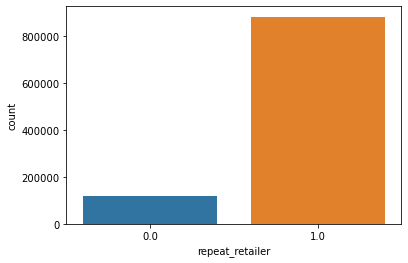

In [21]:
#The vast majority of purchases whether they were fraudulent or not, took place at a frequented retailer.
ax = sns.countplot(x="repeat_retailer", data=df);

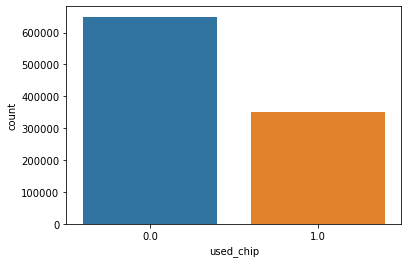

In [22]:
#About 1/3 of purchases were made using a chip while 2/3 were not.
ax2 = sns.countplot(x="used_chip", data=df)

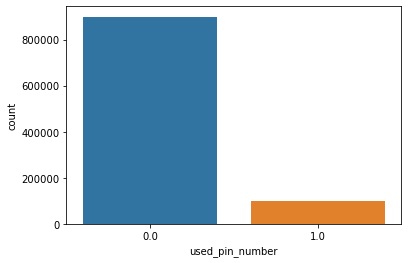

In [23]:
#The vast majority of purchases were made without using a pin number.
ax3 = sns.countplot(x="used_pin_number", data=df)

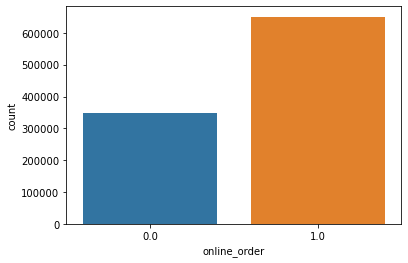

In [24]:
#Purchases made online dominated overall for the total amount of purchases.
ax4 = sns.countplot(x="online_order", data=df)

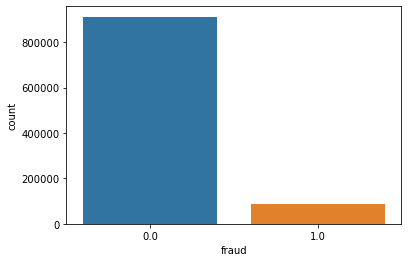

In [25]:
#Only about 1/10 of the overall purchases were recognized as fraudulent.
ax5 = sns.countplot(x="fraud", data=df)

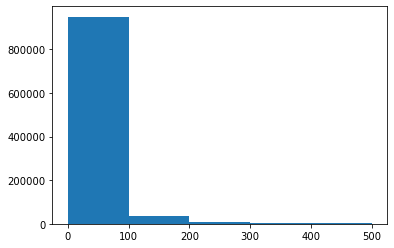

In [44]:
#The majority of purchases were made within a 100km distance from the individual's home. Some stats of interest here are the
#average distance from home being approximately 26km with 75% of purchases being made from this distance or less.
plt.hist(x=df["distance_from_home"], bins=5, range=(0, 500));

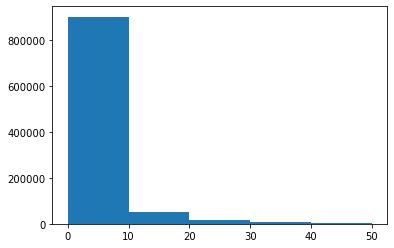

In [45]:
#The most recent of transactions were typically made by an individual who was within 50km of the location of that purchase.
#Some stats of interest here are the average distance from last transaction being 5km with 3/4 of the distance from last
#transaction being 3km away.
plt.hist(x=df["distance_from_last_transaction"], bins=5, range=(0, 50));

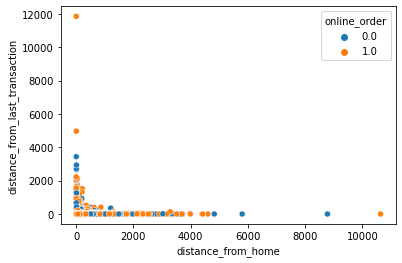

In [53]:
#There is very little correlation between distance from home and distance from last transaction, in fact, almost none but
#there is a correlation of purchases that were made online being made while away from home.
sns.scatterplot(data=df, x="distance_from_home", y="distance_from_last_transaction", hue="online_order");

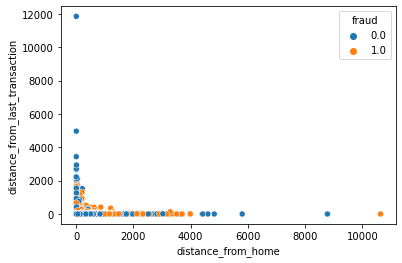

In [54]:
#Although the majority of purchases were not registered as fraudulent, the fraudulent purchases that did occur happened 
#typically at a great distance away from home from between 1000 to 4000km. This scatterplot also shows that the individual
#much closer to the location of that recent transaction versus their distance from home. Fraudulent transactions appear to 
#have occured away from home and nearby their most recent transaction.
sns.scatterplot(data=df, x="distance_from_home", y="distance_from_last_transaction", hue="fraud");

In [ ]:
"""About the same number of transactions registered used a pin number and about the same number of transactions also were
listed as fraudulent. There may be absolutely no correlation there as each set of those transactions may be separate from
one another but it could be that those transactions fall under both features or at least be some significant overlap."""

"""By glancing at the results of the two scatterplots, it can be seen that much of the transactions which occurred away
from home were also made online as much of the individuals with fraudulent transactions made those purchases away from home
but were at the "location" of the purchase signaling that those purchases were very likely online."""

#Hypothesis: The fraudulent credit card transactions were those purchases which were made online while away from home and
#making use of a pin number.

In [ ]:
#Other questions for consideration: Were these purchases made through public wifi while away from home and did these
#individuals fail to take the necessary precautions to protect their privacy and data? Better yet, one should avoid
#public wifi if at all possible or not make purchases, download, etc. while on public wifi.